## Visualisation de la tension aux bornes d'un condensateur placé dans un circuit RC série et soumi à un échelon de tension.

Un échelon de tension est un signal passant brusquement d'une valeur de tension à une autre. Un échelon de tension peut être fait mécaniquement avec un interrupteur ou de manière automatique avec un signal créneau.

La deuxième méthode est avantageuse pour plusieurs raisons (le comportement à la fermeture d'un interrupteur mécanique réel n'est souvent pas celui attendu, l'automatisation permet de faire une acquisition répétitive contrôlée de la tension aux bornes du condensateur, etc.). 

Nous allons donc modéliser dans un premier temps un signal de tension créneau périodique entre une tension nulle et une tension maximale.

Dans un deuxième temps, nous allons modéliser la réponse en tension du condensateur à cet échelon.

Enfin nous traçerons ces deux courbes en fonction du temps.

![](http://sillages.info/wiki/images/e/ea/RC_echelon.png)

### Appel des bibliothèques
Bibliothèques numpy pour la manipulation de tableaux et les fonctions mathématiques et pyplot de matplotlib pour les graphiques.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Construction du signal périodique "échelon de tension"
On note `T` la période du signal `Echelon` en secondes et `E` la tension maximale atteinte par le signal en Volt (le minimum est 0). Le nombre de points utilisés pour représenter ce signal est noté `Nech` ("ech" pour "échantillonage"). Le nombre de périodes à représenté est noté `Nper` ("per" pour "périodes").

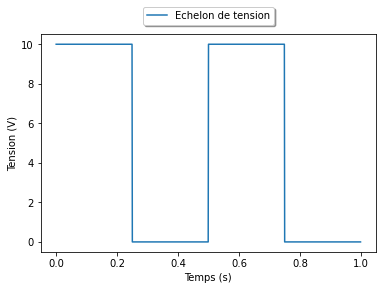

In [2]:
T = 1
E = 10
Nech = 1000
Nper = 2

Neff = Nech-Nech%(2*Nper)#calcul d'un nombre de points réellement utilisé pour représenter ce signal (différent de Nech dans le cas où Nech/(2Nper) n'est pas un nombre entier) 
B = 0#état de la consigne en tension : 0 tension basse => 0 Volt, 1 tension haute => E Volt
Echelon = []
Temps = []
for i in range(Neff):
    if i%(Nech//(2*Nper)) == 0:
        if B:
            B = 0
        else:
            B = 1
    Temps.append(i*T/Neff)
    Echelon.append(B*E)

plt.figure()
plt.plot(Temps, Echelon, label='Echelon de tension')
plt.xlabel('Temps (s)')
plt.ylabel('Tension (V)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          fancybox=True, shadow=True, ncol=2)
plt.show()

### Expression de la réponse en tension du condensateur

Deux méthodes s'offrent à nous pour exprimer la réponse en tension du condensateur. Soit nous utilisons la solution mathématique de l'équation différentielle satisfaite par Uc, soit nous utilisons l'équation différentielle elle-même.

Nous allons ici nous contenter de la première méthode car les solutions s'expriment simplement à partir de fonctions usuelles (l'exponentielle ici).

Cependant, dans la pluspart des cas, c'est la deuxième méthode qui est la seule a pouvoir être utilisée. Lorsque les équations différentielles sont "non linéaires" ($y' + y^2 = 0$ par exemple), ou dépendent de coefficients non constants. Il est très difficile d'obtenir une solution simple dans ces deux cas. 

La deuxième méthode est donnée à titre d'exemple après avoir utilisé la première. Il est important de savoir utiliser la deuxième méthode car plus générale. 


Notons la valeur de la résistance `R` en Ohm, valeur de la capacité du condensateur `C` en Farad.

In [3]:
R = 1e3
C = 1e-5

#### Méthode 1 : tracé de la réponse en tension du condensateur en utilisant la solution de l'équation différentielle


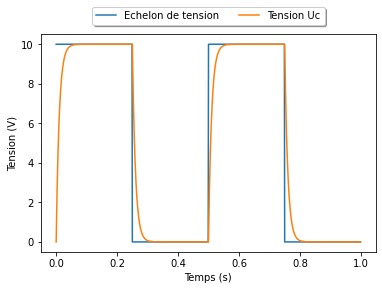

In [4]:
B = 0
Uc = [0]#condition de départ pour Uc : condensateur déchargé
for i in range(Neff):
    if i%(Nech//(2*Nper)) == 0:
        i0 = i
        if B:
            B = 0
        else:
            B = 1
    Uc.append((Uc[i0]-B*E)*np.exp(-(Temps[i]-i0*T/Neff)/(R*C))+B*E)
Uc.pop(0)

plt.figure()
plt.plot(Temps, Echelon, label = 'Echelon de tension')
plt.plot(Temps, Uc, label = 'Tension Uc') 
plt.xlabel('Temps (s)')
plt.ylabel('Tension (V)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          fancybox=True, shadow=True, ncol=2)
plt.show()
    


#### Méthode 2 : tracé de la réponse en tension du condensateur en utilisant l'équation différentielle

Cette méthode nécessite de résoudre numériquement l'équation différentielle. Cette résolution peut être faite à l'aide de la fonction "odeint" contenu dans la bibliotèque scipy (sci py pour "scientific python"). 

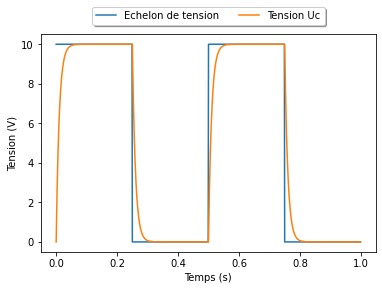

In [5]:
from scipy.integrate import odeint


def reponse_condensateur(Uc,t):
    global R, C, Echelon
    ech = 2*Echelon #Ralonger la fonction échelon : odeint (utilise Temps[n+k] avec k > 1 pour calculer Uc[n]) 
    dUc = (ech[int(t*Neff/T)]-Uc)/(R*C)
    return dUc

Uc_ed = odeint(reponse_condensateur,0,Temps)#"0" est la condition de départ pour Uc : condensateur déchargé 

plt.figure()
plt.plot(Temps, Echelon, label = 'Echelon de tension')
plt.plot(Temps, Uc_ed, label = 'Tension Uc')
plt.xlabel('Temps (s)')
plt.ylabel('Tension (V)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          fancybox=True, shadow=True, ncol=2)
plt.show()

### Complément

Comparaison des deux méthodes 

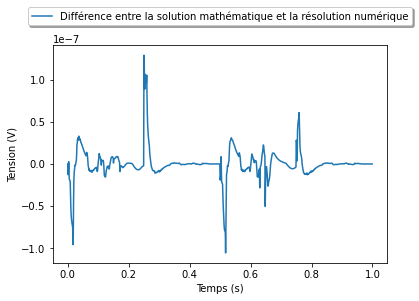

In [8]:
plt.figure()
err = np.array(Uc)-np.array([x[0] for x in Uc_ed])
plt.plot(np.array(Temps), err, label = 'Différence entre la solution mathématique et la résolution numérique')
plt.xlabel('Temps (s)')
plt.ylabel('Tension (V)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=2)
plt.show()